## Ejemplo de Red Neuronal Recurrente (RNN) - Series Temporales

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
leche = pd.read_csv('./Data/produccion-leche.csv',index_col = 'Month')

In [4]:
leche.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [6]:
leche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 7.6+ KB


In [8]:
leche_index = pd.to_datetime(leche.index)

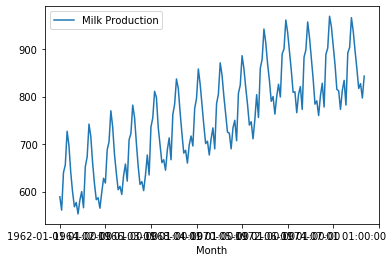

In [9]:
leche.plot()

In [10]:
conjunto_entrenamiento = leche.head(150)
conjunto_pruebas= leche.tail(18)

In [11]:
conjunto_entrenamiento

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1974-02-01 01:00:00,778.0
1974-03-01 01:00:00,889.0
1974-04-01 01:00:00,902.0


In [13]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
entrenamiento_normalizado = normalizacion.fit_transform(conjunto_entrenamiento)
pruebas_normalizado = normalizacion.transform(conjunto_pruebas)

In [15]:
entrenamiento_normalizado

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [16]:
pruebas_normalizado

array([[0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [17]:
def lotes(datos_entrenamiento, tamaño_lote, pasos):
    comienzo = np.random.randint(0,len(datos_entrenamiento)- pasos)
    lote_y = np.array(datos_entrenamiento[comienzo : comienzo + pasos + 1]).reshape(1, pasos + 1)
    return lote_y[:,:-1].reshape(-1,pasos,1), lote_y[:,1,].reshape(-1,pasos,1)